In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# defining dir variables 
root_dir = 'C:/Users/DELL/Downloads/emotions/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'

In [2]:
target_var = os.listdir(train_dir)
target_var

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

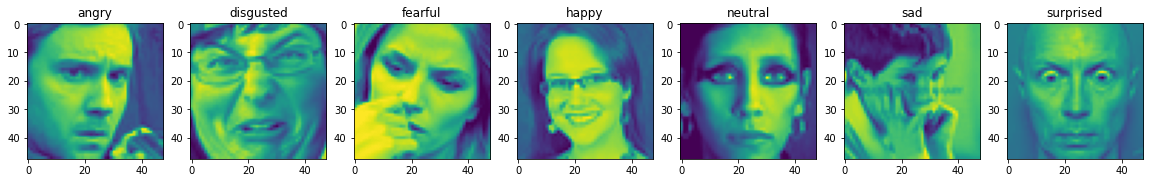

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

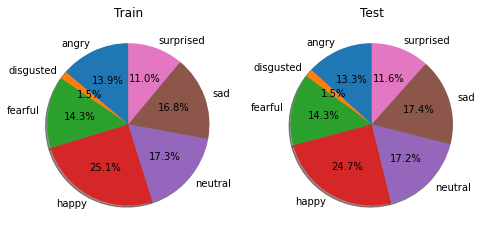

Emotion : angry
	Training : 3995
	 Testing : 958
Emotion : disgusted
	Training : 436
	 Testing : 111
Emotion : fearful
	Training : 4097
	 Testing : 1024
Emotion : happy
	Training : 7215
	 Testing : 1774
Emotion : neutral
	Training : 4965
	 Testing : 1233
Emotion : sad
	Training : 4830
	 Testing : 1247
Emotion : surprised
	Training : 3171
	 Testing : 831


In [4]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [7]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    train ,
    validation_data=valid,
    epochs=2)

Epoch 1/2
315/315 [==============================] - 523s 2s/step - loss: 2.8412 - accuracy: 0.1689 - val_loss: 1.8320 - val_accuracy: 0.2653
Epoch 2/2
315/315 [==============================] - 543s 2s/step - loss: 2.2246 - accuracy: 0.2042 - val_loss: 1.7535 - val_accuracy: 0.3142


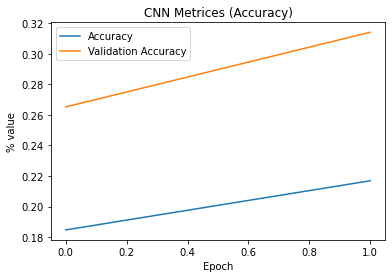

In [9]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

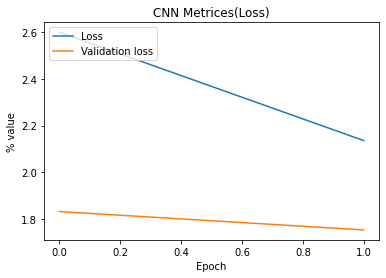

In [10]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [11]:
y_pred = model.predict(test)

In [12]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [13]:
y_actual = test.classes[test.index_array]

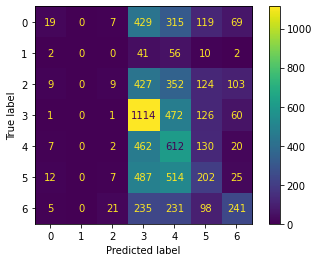

In [14]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [15]:
import os
import cv2
webcam = cv2.VideoCapture(0) #Use camera 0
# We load the xml file
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    ret, img = webcam.read() 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    # Detects faces of different sizes in the input image
    faces = classifier.detectMultiScale(gray, 1.3, 5)
  
    for (x,y,w,h) in faces:
        # To draw a rectangle in a face 
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
    # Display an image in a window
    cv2.imshow('img',img)
  
    # Wait for Esc key to stop
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
# Close the window
webcam.release()
  
# De-allocate any associated memory usage
cv2.destroyAllWindows()
  
    